# 1-Preprocessing phase:

In [2]:
#After importing the dataset using Pandas start by showing the head of the dataset.
import pandas as pd
df = pd.read_csv("C:/file/titanic-passengers.csv",sep=";")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
#then some general information about the data columns and values.
import pandas as pd
df = pd.read_csv("C:/file/titanic-passengers.csv",sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [28]:
#find the missing info in total
print(df.isnull().sum())
print(df.isnull().sum().sum())


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
866


In [34]:
#dropping the missing values
df.dropna(axis=0,inplace=True)


In [35]:
#replacing the missing values of the age column(after dropping them) with the appropriate values with the median().
import pandas as pd
df = pd.read_csv("C:/file/titanic-passengers.csv",sep=";")
df['Age'].fillna(df['Age'].median(),inplace=True)
print(df['Age'])

0      28.0
1      25.0
2      20.0
3      29.0
4      31.0
       ... 
886    14.0
887    22.0
888    30.0
889    28.0
890    19.0
Name: Age, Length: 891, dtype: float64


In [36]:
#replacing the missing values of the age column with the appropriate values with the mode().
import pandas as pd
df = pd.read_csv("C:/file/titanic-passengers.csv",sep=";")
df['Age'].fillna(df['Age'].mode(),inplace=True)
print(df['Age'])

0      28.0
1      25.0
2      20.0
3      29.0
4      31.0
       ... 
886    14.0
887    22.0
888    30.0
889     NaN
890    19.0
Name: Age, Length: 891, dtype: float64


In [8]:
#replacing the missing values of the age column with the appropriate values with the mean().
import pandas as pd
df = pd.read_csv("C:/file/titanic-passengers.csv",sep=";")
df['Age'].fillna(df['Age'].mean(),inplace=True)
print(df['Age'])

0      28.000000
1      25.000000
2      20.000000
3      29.000000
4      31.000000
         ...    
886    14.000000
887    22.000000
888    30.000000
889    29.699118
890    19.000000
Name: Age, Length: 891, dtype: float64


In [170]:
#replacing the missing values of the cabin column with the appropriate values with the frequant name.
number_of_elements = len(df["Cabin"])
print("Number of elements: ", number_of_elements)
print(df["Cabin"].value_counts())
df["Cabin"].fillna('G6',inplace=True)
print(df["Cabin"])

Number of elements:  891
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64
0         G6
1      F G73
2         G6
3         G6
4        B71
       ...  
886       G6
887       G6
888       G6
889       G6
890       G6
Name: Cabin, Length: 891, dtype: object


In [171]:
#Verify that your data is ready to be treated.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [41]:
print(df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [42]:
df["Embarked"].fillna('S',inplace=True)
df["Embarked"].isnull().sum()

0

# 2-Visualization phase:

# Start by studying the distribution of the most important features

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# Visualize the correlation between Sex and Age in a plot in which give us obvious deduction concerning the importance of age and sex in the survival of the individuals.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

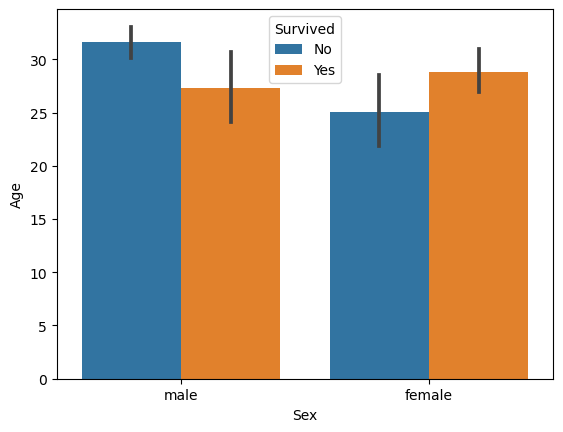

In [49]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("C:/file/titanic-passengers.csv",sep=";")
sns.barplot(x ='Sex', y ='Age', data = df,hue='Survived')

C:\Users\nourain\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


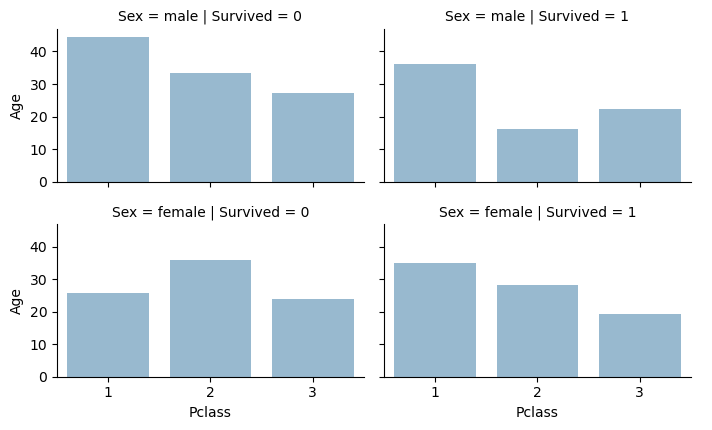

In [175]:
#Pick two other features and study their impact on the survival of the individuals.
grid = sns.FacetGrid(df, row="Sex", col="Survived",height=2.2,aspect=1.6)
grid.map(sns.barplot, "Pclass", 'Age', alpha=.5, ci=None)
grid.add_legend()

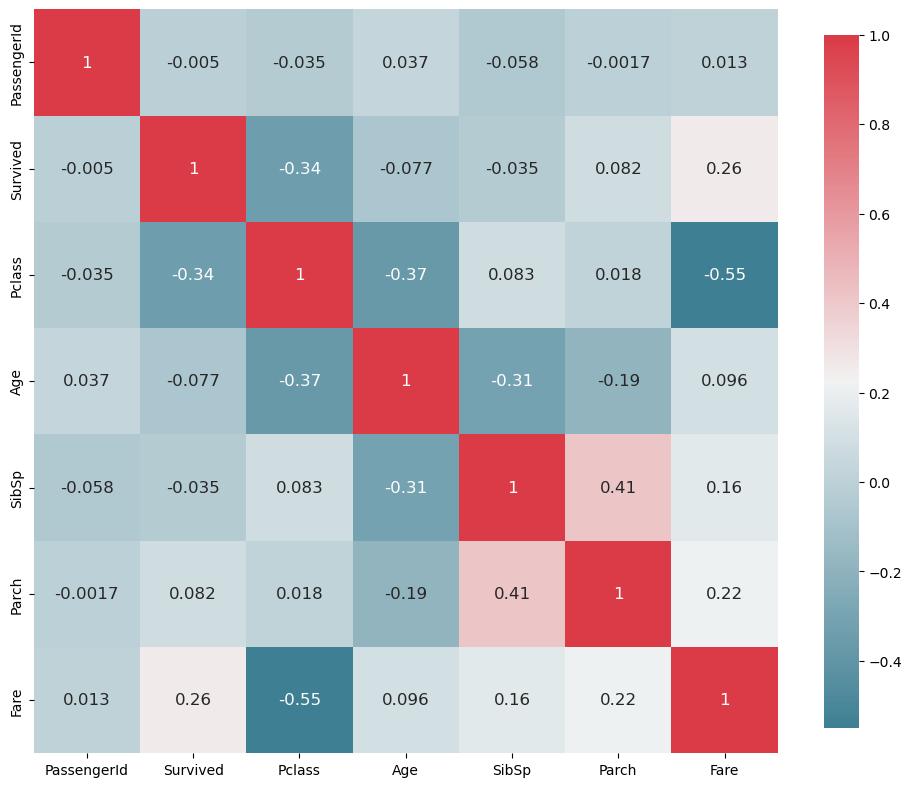

In [46]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

In [19]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 
import pandas as pd
df = pd.read_csv("C:/file/titanic-passengers.csv",sep=";")
cleanup={"Survived":{"Yes":1, "No": 0}} 
df.replace(cleanup, inplace=True)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [77]:
#try to drop the useless columns (such as Names).
import pandas as pd
df = pd.read_csv("C:/file/titanic-passengers.csv",sep=";")
new_df=df.drop(["Name", "PassengerId","Ticket","Parch"], axis = 1)


In [78]:
#checking
new_df

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,No,2,male,28.0,0,13.0000,NaN,S
1,No,3,male,25.0,0,7.6500,F G73,S
2,No,3,male,20.0,0,7.8542,NaN,S
3,No,3,female,29.0,0,21.0750,NaN,S
4,No,1,male,31.0,1,52.0000,B71,S
...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.0,1,30.0708,NaN,C
887,No,3,male,22.0,0,7.2292,NaN,C
888,No,3,female,30.0,0,8.6625,NaN,S
889,No,3,male,NaN,0,7.8958,NaN,S


In [150]:
#create a new column called Title:
df['Title'] = df['Name'].str.split(',|\\.',expand = True)[1] 
df['Title'] = df['Title'].str.strip()
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Ms                1
Name: Title, dtype: int64

C:\Users\nourain\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


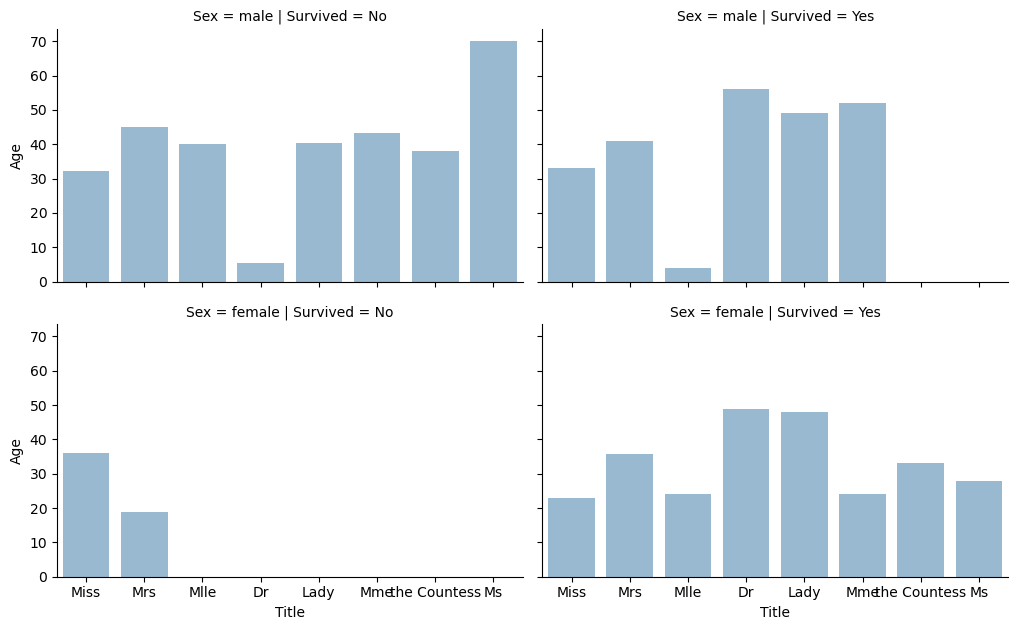

In [153]:
#Visualize the correlation between Title and other features(e.g Sex, Fare, Age);
grid = sns.FacetGrid(df, row="Sex", col="Survived", height=3.2, aspect=1.6)
grid.map(sns.barplot, "Title", 'Age', alpha=.5, ci=None)
grid.add_legend()

In [ ]:
df['Title'] = df['Name'].str.split(',|\\.',expand = True)[1]
df['Title'] = df['Title'].str.strip()

In [144]:
#Visualize the correlation between the new Title dictionary and other features;

dict = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

df["Title"] = df["Title"].map(dict)
print(df['Title'].value_counts())

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


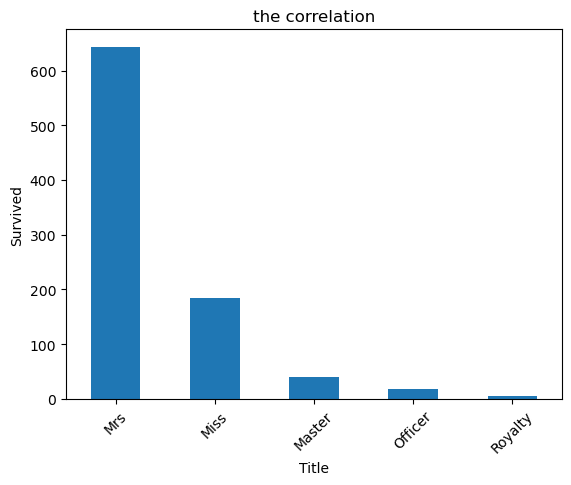

In [145]:
plt.xlabel("Title")
plt.ylabel("Survived")
plt.title("the correlation")
vc=df["Title"].value_counts()
vc.plot.bar(rot=45)
plt.show()


In [160]:
cleanup={"Survived":{"Yes":1, "No": 0}} 
df.replace(cleanup, inplace=True)
df[["Title", "Survived"]].groupby(["Title"], as_index=True).mean()


,Survived
Title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


C:\Users\nourain\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


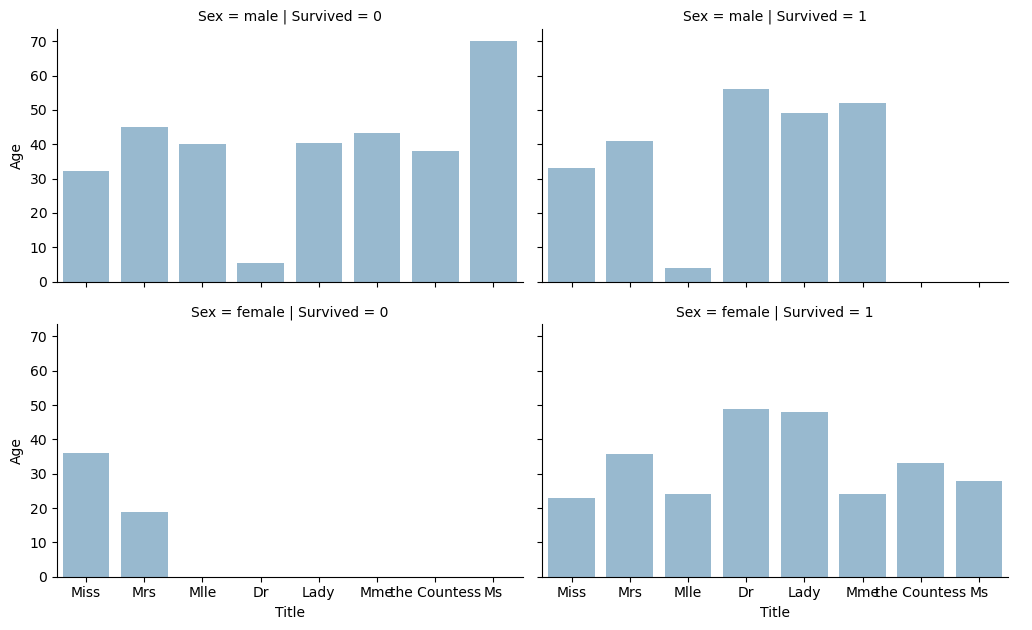

In [161]:
#visualize the same correlations using these new titles 
grid = sns.FacetGrid(df, row="Sex", col="Survived", height=3.2, aspect=1.6)
grid.map(sns.barplot, "Title", 'Age', alpha=.5, ci=None)
grid.add_legend()

<AxesSubplot:xlabel='FamilySize'>

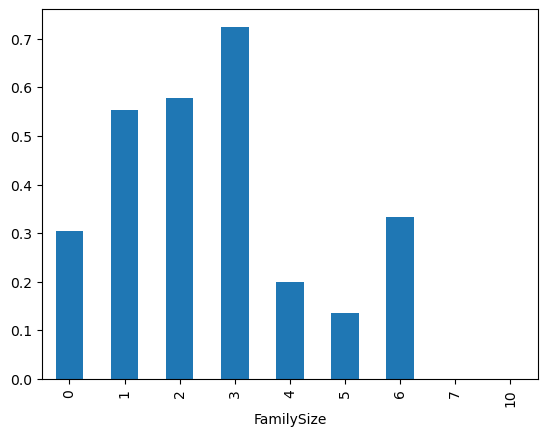

In [168]:
#creating the new column FamilySize;
df["FamilySize"] = df["Parch"] + df["SibSp"]
df['Survived'].groupby(df['FamilySize']).mean().plot(kind='bar')